In [6]:
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_iris


# Load the iris dataset
# The iris dataset is a classic dataset for classification tasks
# and is included in the sklearn library.
# It contains 150 samples of iris flowers, with 4 features:
# sepal length, sepal width, petal length, and petal width.
# The target variable is the species of the iris flower, which can be one of three classes:
# Setosa, Versicolor, or Virginica.
# The dataset is often used for demonstrating machine learning algorithms and techniques.
iris = load_iris(as_frame=True)
df = iris.frame
df.head()
df["target"].value_counts()
df.describe()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


target
0    50
1    50
2    50
Name: count, dtype: int64

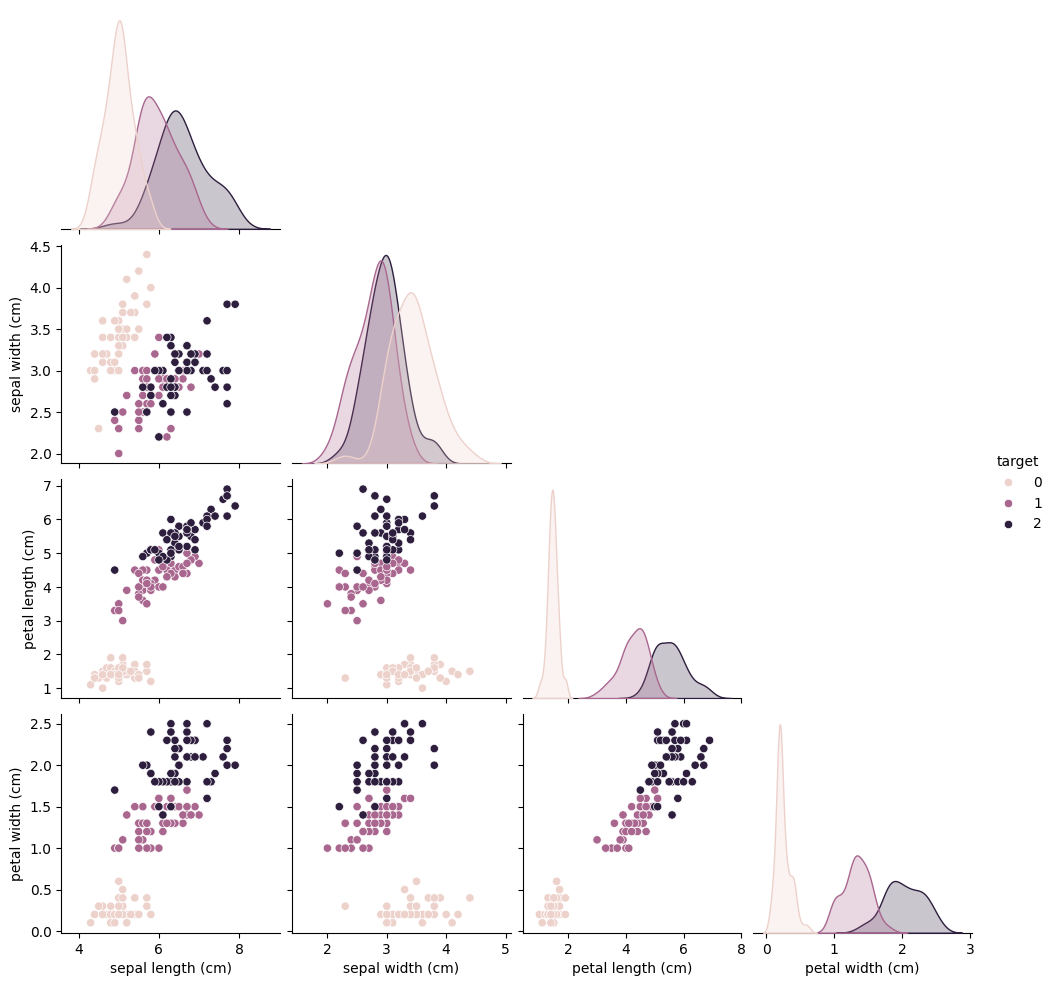

In [7]:
sns.pairplot(df, hue="target", corner=True)
df["target"].value_counts()

In [8]:
# %% 3. Split & Scale

from sklearn.model_selection import train_test_split   # Imports the helper the splits data into training and testing sets
from sklearn.preprocessing import StandardScaler # Imports a scaler that transforms features to mean 0, std 1.
from sklearn.pipeline import Pipeline # Imports a helper that chains together multiple steps in a machine learning workflow
from sklearn.linear_model import LogisticRegression # Imports a logistic regression classifier
x = df.drop("target", axis=1) # Drop the target column from the DataFrame
y = df["target"] # Assign the target column to a separate variable

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42) # Split the data into training and testing sets  #42 is a random seed for reproducibility
# The training set will contain 80% of the data, and the testing set will contain 20%.

pipe = Pipeline([
    ("scaler", StandardScaler()),  # Step 1: Scale the features using StandardScaler
    ("clf", LogisticRegression(max_iter=200))])   # Step 2: Train a Logistic Regression classifier #
      # The max_iter parameter is set to 200 to ensure convergence, and multi_class is set to "ovr" for one-vs-rest classification
# The pipeline allows us to chain together multiple steps in a machine learning workflow, making it easier to manage and maintain the code.
pipe.fit(x_train, y_train)  # Fit the pipeline to the training data

print("Model trained:", hasattr(pipe, "classes_")) # Check if the model has been trained
print("Classes learned:", pipe.classes_) # Print the classes learned by the model

Model trained: True
Classes learned: [0 1 2]


              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



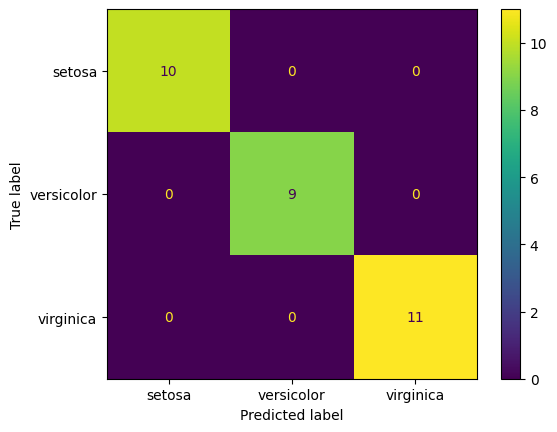

In [9]:
# %% 4. Metrics
# The following code evaluates the performance of the trained model on the test set
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_pred = pipe.predict(x_test)  # Make predictions on the test set 
print(classification_report(y_test, y_pred, target_names=iris.target_names))  # Print the classification report, which includes precision, recall, and F1-score for each class
cm = confusion_matrix(y_test, y_pred)  # Compute the confusion matrix 
ConfusionMatrixDisplay(cm, display_labels=iris.target_names).plot()  # Display the confusion matrix 
plt.show()  # Show the plot